In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/ubuntu/sustaingym


In [3]:
import cvxpy as cp
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

from sustaingym.envs.evcharging.ev_charging import EVChargingEnv

In [3]:
env = EVChargingEnv(gmm_folder="first10days")
eval_env = EVChargingEnv(real_traces=True, sequential=True)

In [4]:
model = PPO('MultiInputPolicy', env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [5]:
from acnportal.acnsim.network.sites import caltech_acn

print(caltech_acn().constraint_matrix.sum(axis=1))
print(caltech_acn().constraint_matrix.sum(axis=0))


[  8.   8.  12. -12.   0.   3.  -6.   3.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


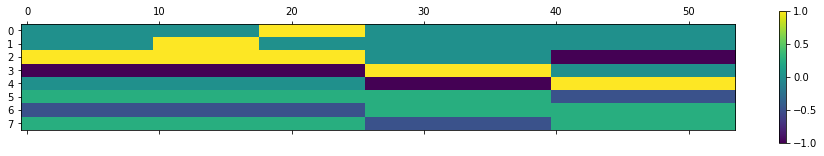

In [6]:
import matplotlib.pyplot as plt

plt.matshow(caltech_acn().constraint_matrix);
plt.colorbar()
plt.show()

In [7]:
caltech_acn().magnitudes

array([ 80.        ,  80.        , 416.66666667, 416.66666667,
       416.66666667, 180.50541516, 180.50541516, 180.50541516])

In [8]:
def eval(n_episodes=10):
    all_rewards = []
    for _ in range(n_episodes):
        avg_rewards = []
        obs = eval_env.reset()
        dones = False
        while not dones:
            action, _states = model.predict(obs)
            obs, rewards, dones, info = eval_env.step(action)
            avg_rewards.append(rewards)
        avg_rewards = np.mean(avg_rewards)
        all_rewards.append(avg_rewards)
    return np.array(all_rewards)

In [9]:
all_rewards = eval()
all_rewards

array([  7.40448612,   5.28494828, -15.8152697 , -12.7191406 ,
        17.41733059,  17.3446337 ,  14.82541379,  19.76574415,
        16.89049361,  -9.1601601 ])

In [10]:
model.learn(total_timesteps=25_000, eval_env=eval_env, n_eval_episodes=10)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 187      |
|    ep_rew_mean     | 4.68e+03 |
| time/              |          |
|    fps             | 37       |
|    iterations      | 1        |
|    time_elapsed    | 54       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 186         |
|    ep_rew_mean          | 4.86e+03    |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 2           |
|    time_elapsed         | 119         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.019045487 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -86.9    

In [11]:
all_rewards = eval()
all_rewards

array([  7.71087993,   5.49728661, -14.48100686, -12.62382454,
        18.65867323,  17.91357267,  14.46645929,  21.11707727,
        17.78470893,  -8.57681368])

In [12]:
all_rewards.mean()

6.746701284285166